### 중심극한정리

c:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


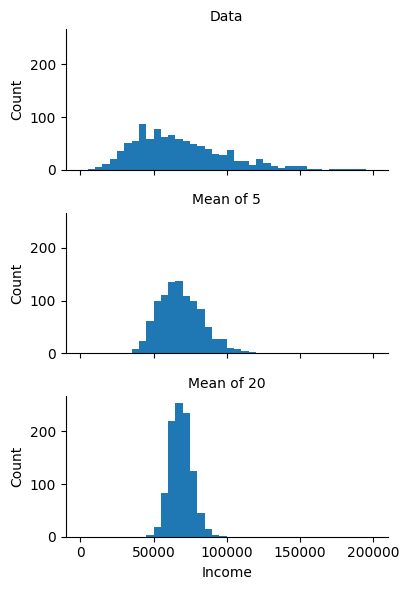

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loans_income = pd.read_csv("C:/big leader/github/Statistics_Study/juha/practical-statistics-for-data-scientists/data/loans_income.csv").squeeze()

sample_data = pd.DataFrame({ #샘플 데이터프레임 생성
    'income' : loans_income.sample(1000), #데이터에서 1000개를 뽑아서 표본 생성
    'type' : 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)], #데이터에서 뽑은 5개의 평균값 *1000번
    'type' : 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)], #데이터에서 뽑은 20개의 평균값 *1000번
    'type' : 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20]) #데이터프레임 합치기

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()

In [9]:
[loans_income.sample(20).mean() for _ in range(1000)]

[x    75510.4
 dtype: float64,
 x    79445.5
 dtype: float64,
 x    86665.7
 dtype: float64,
 x    70462.05
 dtype: float64,
 x    55509.1
 dtype: float64,
 x    58326.45
 dtype: float64,
 x    74277.5
 dtype: float64,
 x    70298.3
 dtype: float64,
 x    75722.0
 dtype: float64,
 x    74544.8
 dtype: float64,
 x    57649.8
 dtype: float64,
 x    68142.75
 dtype: float64,
 x    80075.4
 dtype: float64,
 x    59337.8
 dtype: float64,
 x    64560.65
 dtype: float64,
 x    63886.1
 dtype: float64,
 x    58509.7
 dtype: float64,
 x    71917.9
 dtype: float64,
 x    72550.0
 dtype: float64,
 x    74630.1
 dtype: float64,
 x    52333.0
 dtype: float64,
 x    68234.3
 dtype: float64,
 x    74643.75
 dtype: float64,
 x    65671.0
 dtype: float64,
 x    78808.0
 dtype: float64,
 x    74344.4
 dtype: float64,
 x    69251.6
 dtype: float64,
 x    52443.7
 dtype: float64,
 x    61633.8
 dtype: float64,
 x    69539.9
 dtype: float64,
 x    60492.95
 dtype: float64,
 x    68524.2
 dtype: float64,
 x

### 부트스트랩

In [18]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000) : #부트스트랩 1000번 반복
    sample = resample(loans_income) #데이터 리샘플링, n_samples매개변수를 명시적으로 설정하지 않으면 원래 데이터 갯수만큼 복원추출.(일부 데이터의 중복, 누락 발생)
    results.append(sample.median()) #샘플의 중앙값을 리스트에 추가
results = pd.Series(results) #리스트를 시리즈로 변환

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}') #원 데이터의 모든 값을 기준으로 한 중앙값
print(f'bias: {results.mean() - loans_income.median()}') #부트스트랩한 결과(각 샘플들의 중앙값)의 평균 - 원 데이터의 평균
print(f'std. error: {results.std()}') #부트스트랩한 결과의 표준편차

Bootstrap Statistics:
original: 62000.0
bias: -85.64749999999913
std. error: 232.53568401019248


### 표준정규분포와 QQ그림

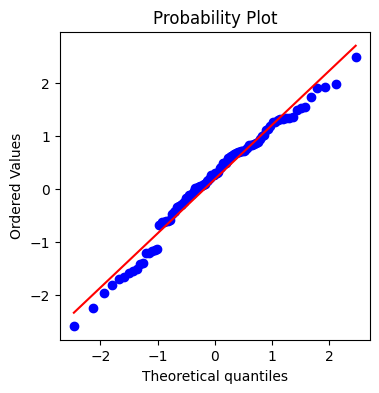

In [20]:
# QQ그림 : 표본이 특정 분포에 얼마나 가까운지를 시각적으로 표현
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))

norm_sample = stats.norm.rvs(size=100) #표준정규분포를 따르는 데이터 추출
stats.probplot(norm_sample, plot=ax) #x축은 분위수, y축은 해당데이터를 올려놓는 함수
plt.show()

### 긴 꼬리 분포

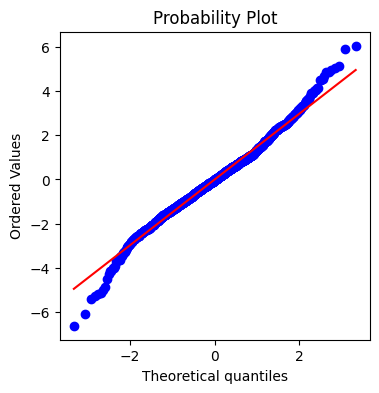

In [27]:
import numpy as np
from scipy import stats

sp500 = pd.read_csv("C:/big leader/github/Statistics_Study/juha/practical-statistics-for-data-scientists/data/sp500_data.csv.gz")
nflx = sp500.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx,plot=ax)
plt.show()

### 이항분포

In [30]:
# n=5번의 독립적인 시도에서 성공확률이 p=0.1일 때 정확히 2번 성공할 확률
stats.binom.pmf(2, n=5, p=0.1) #pmf : 이항분포의 확률질량함수

0.07289999999999992

In [33]:
# n=5번의 독립적인 시도에서 성공확률이 p=0.1일 때 0번, 1번, 2번 성공할 확률
stats.binom.cdf(2, n=5, p=0.1) #cdf : 이항분포의 누적분포함수

0.99144

### 푸아송 분포

In [34]:
stats.poisson.rvs(2, size = 100)

array([1, 1, 2, 0, 1, 4, 1, 5, 1, 0, 2, 0, 1, 1, 4, 2, 1, 3, 4, 3, 2, 4,
       3, 1, 4, 3, 8, 3, 8, 0, 1, 2, 0, 6, 1, 3, 3, 1, 4, 2, 1, 1, 3, 6,
       4, 2, 2, 0, 6, 2, 1, 2, 2, 3, 0, 0, 1, 4, 2, 2, 4, 3, 2, 6, 2, 3,
       1, 2, 2, 4, 2, 2, 2, 2, 2, 1, 6, 3, 1, 1, 0, 0, 3, 0, 4, 3, 3, 1,
       0, 3, 2, 2, 2, 1, 4, 4, 4, 0, 0, 3], dtype=int64)

### 지수분포

In [35]:
stats.expon.rvs(scale = 1/0.2, size=100)

array([ 7.58303219,  0.13480128,  5.50189777,  1.96418352,  2.48865845,
        3.7399314 ,  2.50574051, 15.37025499,  6.12766095,  9.07103414,
        2.99837245,  4.46425496,  0.72753447,  1.30110695,  2.4100196 ,
        0.33073392,  2.43704434,  2.41992153,  1.51692378,  3.54864757,
        5.60706485,  0.33946005,  3.07648426,  4.85919767,  2.95215788,
        3.28095143,  7.49436977,  5.30339615,  3.94081445,  8.46434717,
        1.31967121,  1.36453676,  9.67589928,  4.01847483,  3.90074209,
        0.52404714,  8.00234497,  3.90970782,  0.83486071,  4.0319923 ,
        0.0485002 ,  0.19582227, 11.17554357,  2.04450781,  1.62384916,
        2.7589043 ,  1.24242143,  8.5191533 ,  1.5962559 ,  4.5598195 ,
        3.48078012, 11.67112333,  3.09616954,  1.55848464,  8.8768888 ,
        1.01193819, 16.25069519, 10.43770563,  2.91489412,  0.56807096,
        7.53291334,  1.57086022,  3.62548804,  2.24538581,  0.76759109,
        4.65579112,  5.53402434,  4.63558437,  4.82493383,  5.93

In [36]:
stats.expon.rvs(scale = 5, size = 100)

array([1.05217427e-01, 4.78569535e+00, 8.36316277e-01, 5.12414046e+00,
       5.88328485e+00, 4.23904849e+00, 1.58433473e+00, 6.71196707e+00,
       3.46273960e-01, 1.80007608e+00, 2.01737567e+00, 3.38600378e+00,
       5.14905843e-01, 2.85527378e+00, 4.65944863e+00, 9.35770055e+00,
       1.01690181e+01, 1.76225282e-01, 9.03254826e-01, 6.76432747e+00,
       1.09926340e-01, 4.49220674e-01, 5.05627505e+00, 1.21764929e+01,
       5.30142367e+00, 8.13466165e+00, 3.08245266e+00, 2.87214516e-01,
       1.50214567e+00, 2.75497765e+00, 7.23102119e-01, 1.85134703e+00,
       3.11486371e+00, 2.19794864e+00, 3.71929697e+00, 6.68686576e+00,
       4.92268021e+00, 3.65215980e+00, 9.79222428e-01, 8.08224543e+00,
       3.50105191e-01, 2.56556694e+00, 1.21650636e-01, 2.14415069e+00,
       2.59936422e+00, 3.22052140e+00, 1.03775052e+01, 4.08998759e-01,
       3.81958337e+00, 8.25661673e+00, 6.28506502e+00, 5.45369843e+00,
       6.73631767e+00, 3.33192784e+00, 9.53704915e-01, 2.66741265e+00,
      

### 베이불 분포

In [38]:
stats.weibull_min.rvs(1.5, scale = 5000, size = 100)

array([ 3738.41266215,  6779.37797859,  2061.0593963 ,  1421.13117261,
        6647.47677144,  3748.96142517,  2662.61322192,  9387.32751856,
        5185.83607095,  7554.96950661,  1324.42129795,  2206.77702949,
        6684.58304348,  2704.37458284, 10408.99269806,  4750.13197347,
        5042.43539396,  3823.97393141,  1324.29915184,  4388.87255076,
        4992.3985486 ,  1444.57098656,  3954.46877011,  2186.00065294,
        7740.4798884 , 16996.6889755 ,  5832.38505813,  5152.8397367 ,
        1195.08582808, 12459.58837907, 10523.78132101,  6313.4033676 ,
        7357.44133484,  5293.77923062,  4095.52650625,   167.25402851,
        8182.4567755 ,   704.70358024,  7487.88411002,  6007.31154913,
        1601.37466773,  8803.20596004,  3971.98270848,  4901.1664532 ,
        3199.40981778,    84.07844864,  1236.95472549,  2738.80118399,
        3977.40368239,  8071.88474943,  1883.07490746,  2014.16550816,
         202.12248239,  1626.14172094,  5929.51478077,  4854.91423139,
      